In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 

# load data

In [2]:
def draw_curve(y):
    x = range(len(y))
    # Function to plot 
    plt.plot(x, y) 

    # function to show the plot 
    plt.show()

In [3]:
data = pd.read_csv('./data/普标500市盈率历史数据.csv', delimiter='\t', header=None)

data.rename(columns={0:'date', 1:'PE', 2:'price'}, inplace=True)

for i,row in data.iterrows():
    data.at[i, 'price'] = float(row['price'].replace(',',''))

In [4]:
data = data[:380]

data = data[::-1]

prices = np.array(data['price'])

pes = np.array(data['PE'])

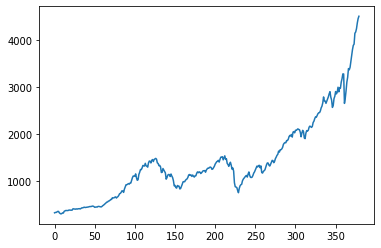

In [5]:
draw_curve(prices)

# livermore
次级回升 0
自然回升 1
上升趋势 2
下降趋势 3
自然回撤 4
次级回撤 5

# 术语说明

自然回撤是指为获利盘的回吐、前期套牢盘的抛压、主力资金的洗盘以及市场谣言和政策造成的短期抛售。


# 状态转移说明

上升趋势|自然回升 状态下：价格回落tho1个点，转为 自然回撤|下降趋势 状态。并标注关键点。

自然回撤|下降趋势 状态下：价格回升tho1个点，转为 自然回升|上升趋势 状态。并标注关键点。



记录方式：
黑墨水 上升趋势
红墨水 下降趋势
铅笔 其他四列
highlight 通常是转折前的最后一个价格，作为观察点
上升趋势转降 画红线
自然回落转升 画红线
也就是 上升趋势 尚未结束，发生的转折点，都画红线。

下降趋势转升 画黑线
自然回升转降 画黑线
也就是 下降趋势 尚未结束，发生的转折点，都画黑线。


(by tho1)
上升趋势 to 自然回撤
自然回升 to 自然回撤

自然回撤 to 自然回升
下降趋势 to 自然回升

自然回撤 to 上升趋势 ？
自然回升 to 下降趋势 ？

(by tho2)
”如果你正在自然回升栏记录数字，最新的价格比自然回升栏内用黑线标记的最后一个价格高3个点或者更多，那么该价格就应当用黑色墨水记入上升趋势栏。“
自然回升 to 上升趋势  （情况1）

”如果你正在自然回落栏记录数字，最新价格比自然回落栏内用红线标记的最后一个价格低3个点或者更多，那么该价格就应当用红色墨水记入下降趋势栏。“
自然回撤 to 下降趋势 （情况1）


”如果你开始在自然回撤栏记录数据，当新的价格低于下降趋势栏内最后记录的数字时，应当将这个价格用红色墨水记录在下降趋势栏中。”
自然回撤 to 下降趋势 （情况2 自然回撤的价格 低于 下降趋势的最低价格时 状态转入 下降趋势）

”当你开始在自然回升栏记录数据的时候，若最新的价格高于上升趋势栏内最后记录的价格，则停止在自然回升栏的记录，将这个价格用黑色墨水记录在上升趋势栏中。“
自然回升 to 上升趋势  （情况2 自然回升的价格 高于 上升趋势的最高价格时 状态转入 上升趋势）


自然回撤 to 次级回升  （发生超过6个点的回升，但是价格没有超过 ”自然回升“列的最后价格，则记录在次级回升）

自然回升 to 次级回撤  （发生超过6个点的回撤，但是价格没有低于 ”自然回撤“列的最后价格，则记录在次级回撤）


上升和下降趋势的结束
”如果股票未能如此变动，并在回升时的买入价格低于之前的关键点（记录在上升趋势栏内下面画有红线的价格）3个点或更多，则说明该股票的本轮上升趋势已经结束。“
”如果这只股票无法做到这一点，并且在一轮回升行情中，高于最新关键点（记录在下降趋势栏下方标有黑线的价格）之上3个点或更多，这说明该股票的本轮下降趋势已经结束。“

”当在自然回升栏记录数据时，若当前回升行情止于上升趋势栏最新关键点（其下方标有红线）下方不远的位置，而且这只股票从这一点开始向下回落3个点或更多，就是一个危险信号，可能说明该股票的上升趋势已经终结。“
”当在自然回撤栏记录数据时，若当前回落行情止于下降趋势栏最新关键点（其下方标有黑线）之上方不远的位置，而且这只股票从这一点开始向上回升3个点或更多，就是一个危险信号，可能说明该股票的下降趋势已经完结。“


* 红线和黑线
上升趋势中的转折点，红线
下降趋势中的转折点，黑线

* 回升的分类
当首次回升时候，没有超过上升趋势的最后价格，就是自然回升，超过了，就变回上升趋势。
当后续回升时候，没有超过”自然回升“栏的最后价格（即最高价格），就是次级回升。
上升趋势中的回升，变回上升趋势的条件是：超过上升趋势中的最后高价。
下降趋势中的回升，变成上升趋势的条件是：超过上次回升的转折点的价格3个点。

总结：在livermore的方法中，上升趋势下的回升，只要超过原有最高价，即可恢复上升趋势。
在下降趋势下的回升，只有双重底，才被认为能够恢复上升趋势。也就是第二次回升超过了第一次回升3个点之后，恢复上升趋势。

不管是上升趋势还是下降趋势下，次级回升，首先要超过回升，转为回升。

* 回撤的分类
类似的
在上升趋势中的回撤，只有双重顶，第二次回撤超过第一次回撤3个点之后，才被认为转入下降趋势。
在下降趋势中的回撤，只要突破之前的低价，就会转为下降趋势。


* 为什么会存在 次级回撤 次级回升？

把问题变得复杂。

原因：假设开始时上升趋势
然后首次进入自然回撤
自然回撤之后进入自然回升（当

* 大趋势

这个设定里，首先要处于一个大趋势，必须是 上升趋势 或 下降趋势。
然后其他的趋势，都处于当前的大趋势之下。
比如 上升趋势中的回撤，回升
下降趋势中的回升，回撤。

大趋势会结束，当下降趋势开始，本轮上升趋势结束。
直到下降趋势结束，下一轮上升趋势重新开始。

似乎未包含 ”横盘“ 状态。



In [50]:
class Records:
    def __init__(self):
        self.data = pd.DataFrame(columns=["次级回升", "自然回升", "上升趋势", "下降趋势", "自然回撤", "次级回撤", "划线"])
    
    def addrow(self, price=None, state=None):
        self.data.loc[len(self.data.index)] = [None, None, None, None, None, None, None]
        if price is not None and state is not None:
            self.data.loc[len(self.data.index)-1][state] = price
    
    def highlight(self, row_index):
        self.data.loc[row_index][6] = True
    
    def num_records(self):
        return len(self.data)
    
    def __repr__(self):
        return str(self.data)

In [52]:
# state list:
# 0: recovery2nd 
# 1: recovery 
# 2: uptrend 
# 3: downtrend 
# 4: retracement 
# 5: retracement2nd

# define state
RECOVERY2ND_STATE=0
RECOVERY_STATE=1
UPTREND_STATE=2
DOWNTREND_STATE=3
RETRACEMENT_STATE=4
RETRACEMENT2ND_STATE=5

In [ ]:
class StateAgent:
    def __init__(self, tho1=6, tho2=3):
        """
        # 趋势转变阈值 tho1, tho2
        """
        self.tho1 = tho1
        self.tho2 = tho2
        
        self.cur_val = None
        self.cur_state = None
        self.state_vals = [0]*6
        
        self.major_trend = None # 0 uptrend 1 downtrend
    
    def evaluate(self, val):
        # 如果是初始输入值，无法确定状态，返回None
        if self.cur_val == None:
            self.cur_val = val
            return None
        
        # 如果是第二个输入值，和第一个值比较，确定状态
        if self.cur_state == None:
            return self.from_none_state(val)
            
        if self.cur_state == RECOVERY2ND_STATE:
            return self.from_recovery2nd(val)
        
        if self.cur_state == RECOVERY_STATE:
            return self.from_recovery(val)
        
        if self.cur_state == UPTREND_STATE:
            return self.from_uptrend(val)
        
        if self.cur_state == DOWNTREND_STATE:
            return self.from_downtrend(val)
        
        if self.cur_state == RETRACEMENT_STATE:
            return self.from_retracement(val)
        
        if self.cur_state == RETRACEMENT2ND_STATE:
            return self.from_retracement2nd(val)
        
    def from_none_state(self, val):
        # 如果是第二个输入值，和第一个值比较，确定状态
        self.cur_state = 2 if val > self.cur_val else 3
        self.cur_val = val
        return self.cur_state
        
    def from_recovery2nd(self, val):
        """
        当状态为 次级回升 0
        次级回升状态 可以转化为：
        1 上升趋势
        2 自然回撤
        3 次级自然回撤
        4 保持次级回升
        """
        if val > self.state_vals[RECOVERY2ND_STATE]:
            # 如果价格高于上一个上升趋势
            if val > self.state_vals[UPTREND_STATE]:
                self.to_uptrend()
            # 如果价格高于上一个次级回升
            if val > self.state_vals[RECOVERY_STATE]:
                self.to_recrvery()
        else:
            # 当价格下降
            diff = self.state_vals[RECOVERY2ND_STATE] - val
            if diff >= self.tho1:
                d
    
    def from_recovery(self, val):
        """
        当状态为 自然回升状态 1
        自然回升状态 可以转化为:
        1 可以转化为 自然回撤 （新价格低于自然回升上一个价格，超过6点时）
        2 可以转化为 次级自然回撤 （发生超过6个点的回撤，但是价格没有低于 ”自然回撤“列的最后价格，则记录在次级回撤）
        3 可以转化为 上升趋势 （新价格高于 “自然回升”栏上一个黑线标记价格3个点时）
        4 可以保持自然回升
        不会转化为：下降趋势
        """
        
    def from_uptrend(self, val):
        """
        当状态为 上升趋势 2
        上升趋势 可以转化为：
        1 保持上升趋势 
        2 转入自然回撤状态
        不会转化为：下降趋势 自然回升 次级自然回升 次级自然回撤（最后一个不太确定）
        """
        highlight = False
        if val > self.state_vals[UPTREND_STATE]:
            # 如果当前val大于上一个上升趋势的val
            self.state_vals[UPTREND_STATE] = val
        else:
            # 如果当前val小于上一个上升趋势的val
            # 差值达到tho1，转入自然回撤状态
            diff = self.state_vals[UPTREND_STATE] - val
            if diff >= self.tho1:
                self.cur_state = RETRACEMENT_STATE
                self.state_vals[RETRACEMENT_STATE] = val
                highlight = True
        return self.cur_state, highlight
    
    def from_downtrend(self, val):
        """
        当状态为 下降趋势 3
        下降趋势 可以转化为：
        1 保持下降趋势 
        2 自然回升
        """
        highlight = False
        if val < self.state_vals[DOWNTREND_STATE]:
            # 如果当前val小于上一个上升趋势的val
            self.state_vals[DOWNTREND_STATE] = val
        else:
            # 如果当前val小于上一个上升趋势的val
            # 差值达到tho1，转入自然回升状态
            diff = val - self.state_vals[DOWNTREND_STATE]
            if diff >= self.tho1:
                self.cur_state = RECOVERY_STATE
                self.state_vals[RECOVERY_STATE] = val
                highlight = True
        return self.cur_state, highlight
    
    def from_retracement(self, val):
        """
        自然回撤 可以转化为：
        1 下降趋势
        2 自然回升
        3 次级回升
        4 保持 自然回撤
        不会转化为： 上升趋势 次级回撤
        """
    
    def from_retracement2nd(self, val):
        """
        次级回撤 可以转化为：
        1 自然回撤
        2 自然回升
        3 次级回升
        4 保持次级回撤
        不会转化为：上升趋势 下降趋势
        """

In [ ]:
# 初始化记录器
records = Records()
# 初始化状态分析器
state_agent = StateAgent()

for val in prices:
    new_state, highlight = state_agent.evaluate(val)
    if highlight:
        records.highlight(records.num_records())
    records.addrow(price=val, state=new_state)

In [13]:
# 初始化状态

if prices[1] > prices[0]:
    status = 2
    # 初始化 当前上升趋势最高点high 
    high = prices[1]
else:
    status = 3
    # 初始化 当前下降趋势最低点low
    low = prices[1]
    
records.append((prices[0], status))
records.append((prices[1], status))

In [9]:
for i,p in enumerate(prices[2:]):
    
    if status == 2:
        # 上升趋势中
        if p > high:
            high = p
            records.append((high, status))
        elif high > p:
            diff = high - p
            if diff >= tho1:
                # 如当前价格低于high达到tho1，状态转为自然回撤
                keypoints.append(len(records)-1)
                status = 4
                low = p
                records.append((low, status))
    elif status == 4:
        # 自然回撤中
        if p < low:
            low = p
            records.append((low, status))
        elif p - low:
            diff = p - low
            if diff >= tho1:
                # 如当前价格高于low达到tho1，状态转为自然回升
                keypoints.append(len(records)-1)
                status = 1
                low = p
                records.append((low, status))
    elif status = 1:
        # 自然回升中
        if p